u: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
u shape (4, 4) 

u after applying boundary conditions:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
v after applying boundary conditions:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


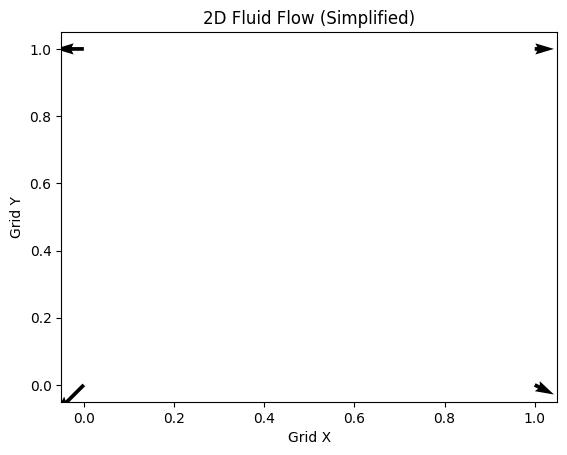

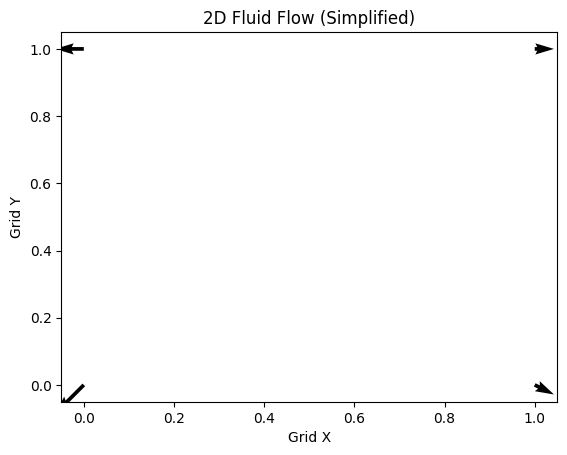

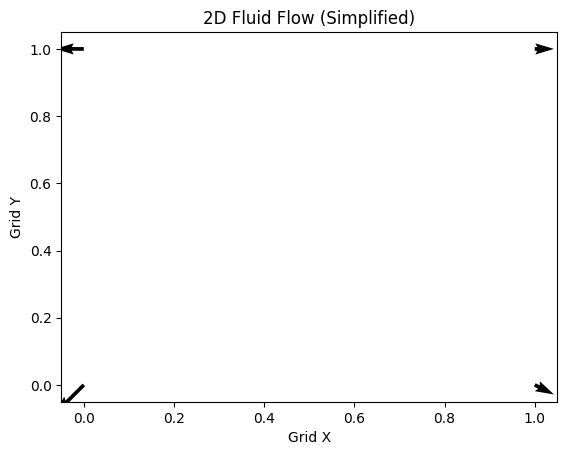

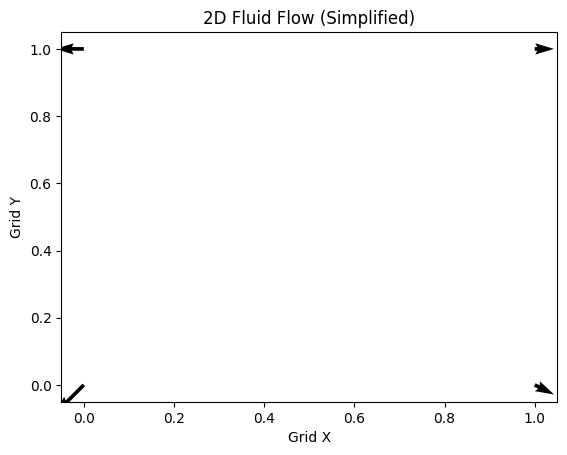

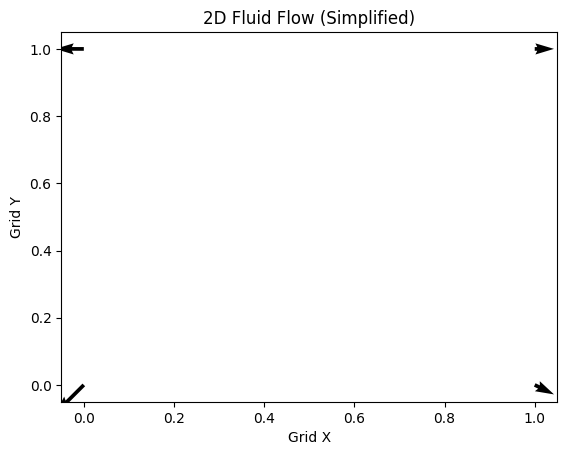

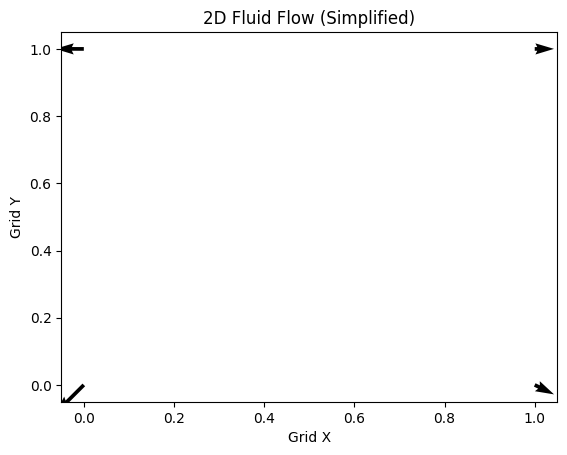

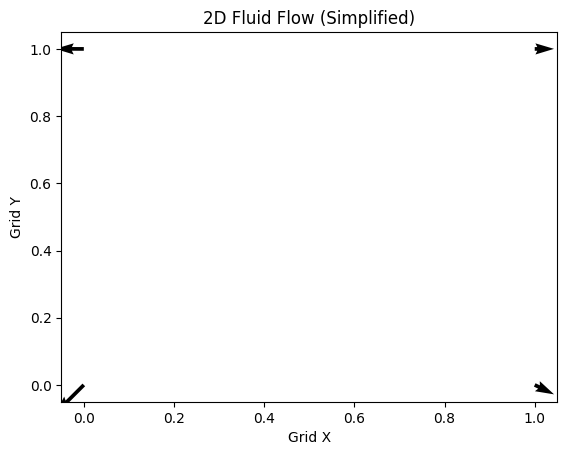

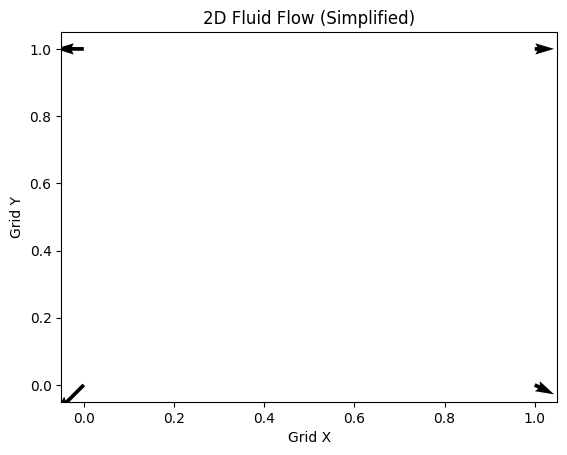

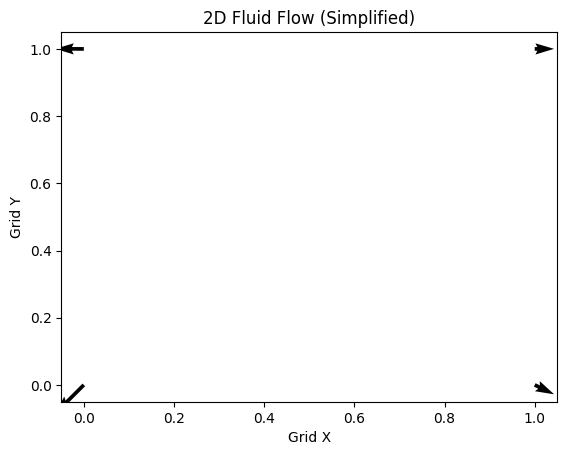

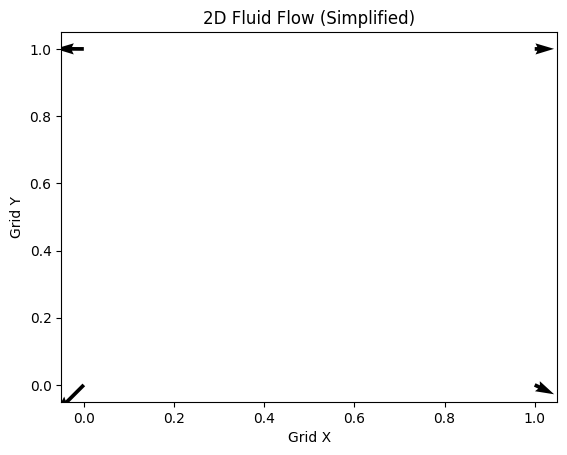

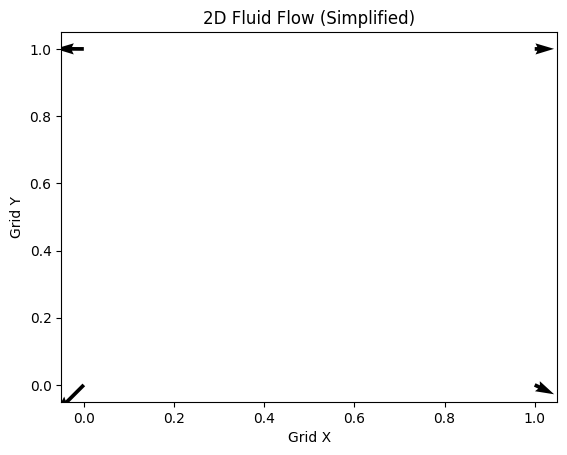

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(N):
    # Create velocity (u,v) and pressure (p) fields on a (N+2)x(N+2) grid:
    u = np.zeros((N+2, N+2))  # x-component of velocity
    print('u:',u)
    print('u shape', u.shape,'\n')
    v = np.zeros((N+2, N+2))  # y-component of velocity
    # print('v',v)
    p = np.zeros((N+2, N+2))  # pressure field
    # print('p',p)
    return u, v, p

def apply_boundary_conditions(u, v, N, inlet_velocity=1.0):
    # Apply no-slip conditions on four walls
    u[0, :] = 0      # bottom wall
    u[-1, :] = 0     # top wall
    u[:, 0] = 0      # left wall
    u[:, -1] = 0     # right wall
    v[0, :] = 0      # bottom wall
    v[-1, :] = 0     # top wall
    v[:, 0] = 0      # left wall
    v[:, -1] = 0     # right wall

    # Set inlet condition (e.g., left side inlet)
    u[:, 0] = inlet_velocity
    return u, v

def pressure_projection(u, v, p, dx, dy, max_iter=50, tol=1e-4):
    # Use a simple Jacobi iteration to solve the pressure Poisson equation
    for iteration in range(max_iter):
        p_new = p.copy()
        p_new[1:-1, 1:-1] = 0.25 * (p[1:-1, 2:] + p[1:-1, 0:-2] +
                                    p[2:, 1:-1] + p[0:-2, 1:-1] -
                                    dx * dy * (
                                        (u[1:-1, 2:] - u[1:-1, 0:-2]) +
                                        (v[2:, 1:-1] - v[0:-2, 1:-1])
                                    ))
        if np.linalg.norm(p_new - p) < tol:
            break
        p = p_new
    return p

def simulation_step(u, v, p, dx, dy, dt, viscosity):
    # This is a simplified placeholder for advection, diffusion, and projection in one step.
    # Proper implementations would include separate advection and diffusion steps.
    
    # For demonstration, we simply perform a pressure correction.
    p = pressure_projection(u, v, p, dx, dy)
    u_new = u.copy()
    v_new = v.copy()
    
    # Update velocity fields by subtracting the pressure gradient
    u_new[1:-1, 1:-1] -= dt/dx * (p[1:-1, 1:-1] - p[1:-1, 0:-2])
    v_new[1:-1, 1:-1] -= dt/dy * (p[1:-1, 1:-1] - p[0:-2, 1:-1])
    
    return u_new, v_new, p

def main():
    N = 2                # grid size (number of cells in one dimension)
    dx = dy = 1.0 / N      # grid spacing
    dt = 0.01              # time step size
    viscosity = 0.1        # fluid viscosity
    steps = 10           # number of simulation steps

    # Initialize simulation fields
    u, v, p = initialize_grid(N)
    u, v = apply_boundary_conditions(u, v, N)
    
    print('u after applying boundary conditions:\n',u)
    print('v after applying boundary conditions:\n',v)

    # Time-stepping loop
    for step in range(steps):
        u, v, p = simulation_step(u, v, p, dx, dy, dt, viscosity)
        plt.quiver(u[1:-1, 1:-1], v[1:-1, 1:-1])
        plt.title("2D Fluid Flow (Simplified)")
        plt.xlabel("Grid X")
        plt.ylabel("Grid Y")
        plt.show()
    # Visualize the velocity field using a quiver plot
    # Remove the boundary cells for visualization clarity.
    plt.quiver(u[1:-1, 1:-1], v[1:-1, 1:-1])
    plt.title("2D Fluid Flow (Simplified)")
    plt.xlabel("Grid X")
    plt.ylabel("Grid Y")
    plt.show()

if __name__ == '__main__':
    main()


In [13]:
z = np.zeros((2,2))
print(z)
print(z.shape)

[[0. 0.]
 [0. 0.]]
(2, 2)
